In [1]:
!pip install roboflow # install the roboflow package

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
!pip install inference-cli inference server start

ERROR: Could not find a version that satisfies the requirement server (from versions: none)
ERROR: No matching distribution found for server


In [3]:
!pip install supervision #

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 3.8 MB/s eta 0:00:00


In [ ]:
# !inference infer https://source.roboflow.com/IIpOON23bTUVex55U1HkAZIQf3n1/t0OtCWUxm1F4G0vomlbA/original.jpg \
# --api-key mUrsQbxWSormdm9CAmZ5 \
# --project-id zxczada --model-version 1

/bin/bash: line 1: inference: command not found


In [ ]:
!pip install inference-sdk # install the inference sdk package

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.6 MB/s eta 0:00:00


In [ ]:
# from inference_sdk import InferenceHTTPClient

# CLIENT = InferenceHTTPClient(
#     api_url="https://detect.roboflow.com",
#     api_key="mUrsQbxWSormdm9CAmZ5"
# )

# result = CLIENT.infer('/content/images (4).jpg', model_id="zxczada/1") # make sure the image file is a string

In [6]:
!pip install inference-sdk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.5 MB/s eta 0:00:00


In [7]:
from inference_sdk import InferenceHTTPClient

# Initialize the inference client with your Roboflow API URL and API key
client = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="mUrsQbxWSormdm9CAmZ5"
)

# Specify the path to the image you want to infer on (make sure it's valid and accessible)
image_path = '/content/AccidentTestTrafficLight.jpg'

# Run inference using the model ID from your Roboflow project
result = client.infer(image_path, model_id="zxczada/1")

# Print or process the result as needed
print(result)


{'inference_id': '89cf70f9-4fab-48b8-b999-4d5bd9efa068', 'time': 0.15542996600015613, 'image': {'width': 1818, 'height': 1228}, 'predictions': [{'x': 531.0, 'y': 797.5, 'width': 368.0, 'height': 141.0, 'confidence': 0.4897500276565552, 'class': 'front-bumper-dent', 'class_id': 10, 'detection_id': '7d0b726c-f140-416b-9d12-21a68df9b682'}]}


TypeError: Image data of dtype <U37 cannot be converted to float

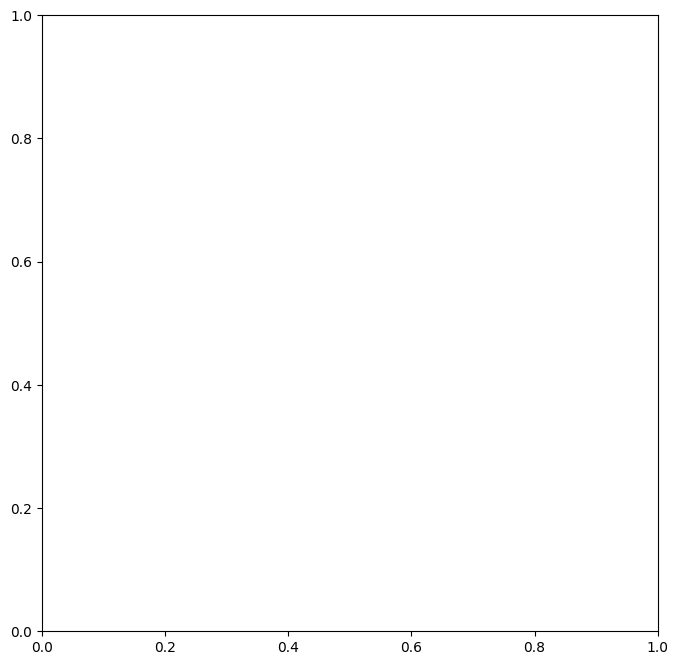

In [10]:
import matplotlib.pyplot as plt
# Display the image with bounding boxes and predictions
plt.figure(figsize=(8, 8))
plt.imshow(image_path)
plt.axis("off")  # Hide axis
plt.show()

# Print the inference result (for debugging or further processing)
print(result)

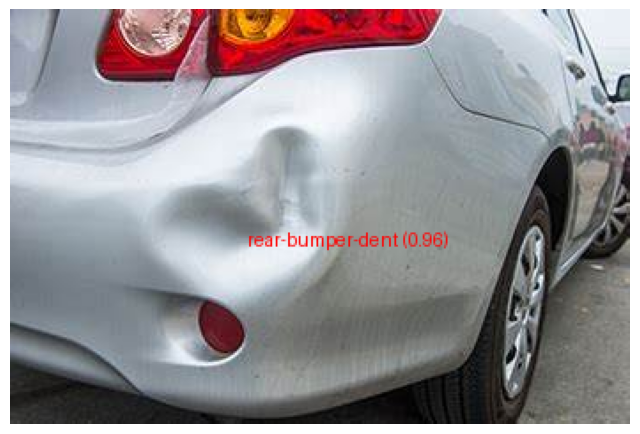

{'inference_id': '306d4cd4-efb9-43bf-bb77-60820fd6fdd8', 'time': 0.09078945599867438, 'image': {'width': 350, 'height': 234}, 'predictions': [{'x': 133.5, 'y': 134.0, 'width': 267.0, 'height': 154.0, 'confidence': 0.9553496241569519, 'class': 'rear-bumper-dent', 'class_id': 13, 'detection_id': '85d920b0-b91f-4a9a-ba69-b04f2b7bfce6'}]}


In [20]:
from inference_sdk import InferenceHTTPClient
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Initialize the inference client with your Roboflow API URL and API key
client = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="mUrsQbxWSormdm9CAmZ5"
)

# Specify the path to the image you want to infer on
image_path = '/content/RearDamage.jpeg'

# Run inference using the model ID from your Roboflow project
result = client.infer(image_path, model_id="zxczada/1")

# Load the image
img = Image.open(image_path)

# Create a drawing context to draw on the image
draw = ImageDraw.Draw(img)

# Assuming result contains bounding boxes and predictions (adapt this according to your result structure)
for prediction in result['predictions']:
    # Extract bounding box coordinates (x, y, width, height)
    x, y, width, height = prediction['x'], prediction['y'], prediction['width'], prediction['height']
    label = prediction['class']  # Predicted class label

    draw.text((x, y - 10), f"{label} ({confidence:.2f})", fill="red")

# Display the image with bounding boxes and predictions
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")  # Hide axis
plt.show()

# Print the inference result (for debugging or further processing)
print(result)


In [21]:

for prediction in result['predictions']:
  print(prediction['class'])


rear-bumper-dent


In [ ]:
# from roboflow import Roboflow
# import supervision as sv
# import cv2

# rf = Roboflow(api_key="mUrsQbxWSormdm9CAmZ5")
# project = rf.workspace().project("zxczada")
# model = project.version(1).model

# result = model.predict("/content/images (4).jpg", confidence=40, overlap=30).json()

# labels = [item["class"] for item in result["predictions"]]

# detections = sv.Detections.from_roboflow(result)

# label_annotator = sv.LabelAnnotator()
# bounding_box_annotator = sv.BoxAnnotator()

# image = cv2.imread("/content/images (4).jpg")

# annotated_image = box_annotator.annotate(
#     scene=image, detections=detections)
# annotated_image = label_annotator.annotate(
#     scene=annotated_image, detections=detections, labels=labels)

# sv.plot_image(image=annotated_image, size=(16, 16))